# Clustering:
Clustering aim at identifying is a data set can be group in to various subgroups known as clusters. 

 - First,  <em> Assessing Clustering Tendency</em>: evaluate whether the datasets contains meaningful clusters (non-random structures) or not. 
 - If yes, identify how many clusters are there. 

We address the question of the optimal number of clusters for an optimal clustering. Some algorithms like <code>kmeans</code> require the number of clusters an input parameter. Determining an optimal number of cluster is  an optimization problem and in general, the opmization is perform on the `distance` between points within the cluster and distance between points in different clusters.

NOTE: If blindly applied, clustering methods will return clusters even if the data does not contain meaningful clusters.


## Identifying number of clusters
The methods addressed in the notebooks are:
   - The Elbow Method
   - The Silhouette Method

### The Elbow Method
The Elbow method is a well-known simple, abeit naive, method for determining the optimal number of clusters.
In a clustering algorithm like, <code> kmeans </code>, the basic idea behind partitioning methods is to identify clusters such that the total intra-cluster variation [or total within-cluster sum of square (WSS)] is minimized. WSS is the Squared Error for each point is the square of the distance of the point from its representation i.e. its predicted cluster center.

In regard, the smaller the total WSS then more compact the clusters. So WSS measures the compactness of the clustering and we want it to be as small as possible.

In the Elbow method, the total WSS calculated as a function of number of clusters and ideal cluster number is that which that which any further increase leads to no improvement in WSS. Elbow method works as follows:

  -  Compute clustering algorithm for different values of k
  -  For each k, calculate WSS.
  -  Plot WSS vs the number of clusters k.
  -  The elbow location in the plot is generally an indicator of the appropriate number of clusters.

Mathematically, WSS, expressed as \\(W_k\\) is
\\[ W_k = \sum_{r=1}^k{1 \over n_r}D_r \\]

where \\(k\\) is the number of clusters, \\(n_r\\) is the number of points in cluster \\(r\\) and \\(D_r\\) is the sum of distances between all points in a cluster: 

\\[ D_r = \sum_{i=1}^{n_r-1}\sum_{j=1}^{n_r} d_{ij} = \sum_{i=1}^{n_r-1}\sum_{j=1}^{n_r} ||d_i-d_j||_2 \\]

where distance measure like `Euclidean` or `Manhattan` etc can be used.

Let us implement this in Python using the **sklearn** library and our own function for calculating WSS for a range of values for k.

We will use our own dataset generated by the code below for an illustration of the two methods:

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt #for plotting
import seaborn as sns
#sns.set(style="darkgrid")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

In [10]:
def plot_scatter(X, y):
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.axis('off')
    plt.show()

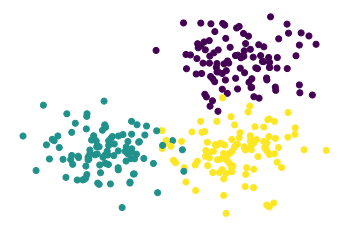

In [11]:
plot_scatter(X, labels_true)

In [16]:
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
    '''
    Calculate the WSS score for K values from 1 to kmax-1
    
    Inputs
    -------
    points: the list of points in the dataset
    kmax: maximum number of clusters
    
    return:
    sse: Sum of squared distances of samples to their closest cluster center kmeans.inertia_
    '''

    sse = []
    for k in range(1, kmax):
        '''
        For each cluster k, the Kmean is fitted and WSS extracted from kmeans.inertia_
        '''
        kmeans = KMeans(n_clusters = k).fit(X=points)
        sse.append(kmeans.inertia_)
        
    return sse

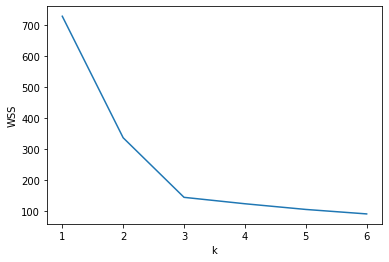

In [20]:
Km = 7
plt.plot(list(range(1,Km)), calculate_WSS(X, Km))
plt.xlabel('k')
plt.ylabel('WSS')
plt.show() 

### The Silhouette Method


The Silhouette measures tells us the quality of a clustering. The Silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation). An optimal number of clusters k is the one that maximize the average Silhouette score over a range of possible values for k (Kaufman and Rousseeuw 1990).
Silhouette score can be interpreted as follow:

 *   Clustering model with \\(S_i\approx 1\\)  are very well clustered and  small \\(S_i \approx 0\\) signify presence of observation between two clusters.
 *   Clustering model with a  negative \\(S_i \\) are probably placed in the wrong cluster.
 
This optimal number of clusters is computed in a similar fashion as done above for the elbow method:

  -  Compute clustering algorithm for different values of k
  -  Calculate the average dissimilarity \\( a_i \\) between each point \\( i \\) and all other points in it's cluster
  -  Calculate the average dissimilarity \\( d(i, C) \\) between each point \\( i \\) and all points in other clusters \\( C \\), then obtain \\( b_i := \min_{C} d(i,C) \\)
  -  Lastly, the silhouette score of the observation \\( i \\) is defined as: \\( S_i = {{b_i − a_i} \over {\max(a_i, b_i)}} \\) for  if \\( |Ci|>1 \\) and \\( 0\\) othewise
 
Mathematically, for each data point \\( i \in C_i \\), expresst the dissimilarity \\( a_i \\) is

\\[ a_i = {1\over (|C_i|-1)} \sum_{i\in C_i, i\ne j} d(i,j) \\].

Also,  for each data point \\( i \in C_i \\) dissimilarity with points in other clusters is

  \\[   b(i) = \min_{i\neq j} { 1\over |ci|}\sum_{j\in C_j}d(i,j) \\].
     
\\( d(i, j)\\) is the distance between points \\(i \\) and \\( j \\).This is also the nearest cluster to which it does not belong.
The Silhouette score can be easily calculated in Python using the metrics module of the sklearn library.

In [21]:
def calculate_silhouette(data, kmax, metric = 'euclidean'):
    '''
    Calculate the WSS score for K values from 1 to kmax-1
    
    Inputs
    -------
    points: the list of points in the dataset
    kmax: maximum number of clusters
    
    return:
    sse: Sum of squared distances of samples to their closest cluster center kmeans.inertia_
    '''

    sil = []
    for k in range(2, kmax):
        '''
        For each cluster k, the Kmean is fitted and WSS extracted from kmeans.inertia_
        '''
        kmeans = KMeans(n_clusters = k).fit(X=data)
        labels = kmeans.labels_
        sil.append(silhouette_score(data, labels, metric = metric))
        
    return sil

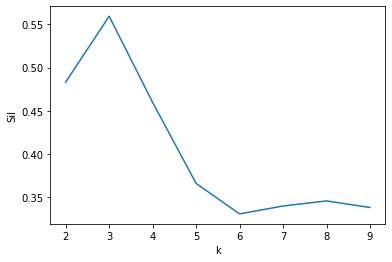

In [22]:
Km = 10
plt.plot(list(range(2,Km)), calculate_silhouette(X, Km))
plt.xlabel('k')
plt.ylabel('Sil')
plt.show() 

Other techniques like [Gap Statistic Methodes](http://web.stanford.edu/~hastie/Papers/gap.pdf) compares the total within intra-cluster variation for different values of k with their expected values under null reference distribution of the data. An interested reader can read the link.


In [23]:
from sklearn.datasets import load_digits
digits = load_digits()

In [9]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [24]:
X_digits, y_digits = digits.data, digits.target

In [26]:
X_digits[0].shape

(64,)

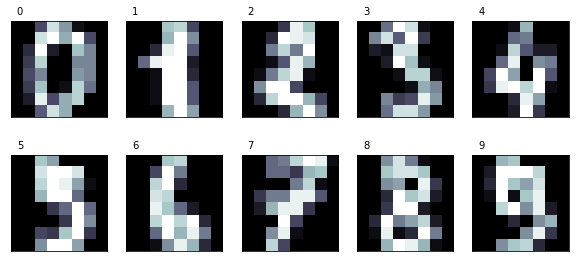

In [10]:
import matplotlib.pyplot as plt
n_row, n_col = 2, 5

def print_digits(images, y, max_n=10):
    # set up the figure size in inches
    fig = plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    i=0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone, interpolation='nearest')
        # label the image with the target value
        p.text(0, -1, str(y[i]))
        i = i + 1

print_digits(digits.images, digits.target, max_n=10)

In [27]:
def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow',
              'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        px = X_pca[:, 0][y_digits == i]
        py = X_pca[:, 1][y_digits == i]
        plt.scatter(px, py, c=colors[i])
    plt.legend(digits.target_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')

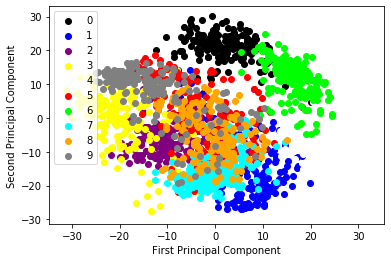

In [28]:
from sklearn.decomposition import PCA
estimator = PCA(n_components=10)
X_pca = estimator.fit_transform(X_digits)

plot_pca_scatter()

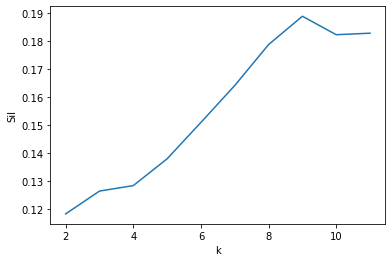

In [30]:
Km = 12
plt.plot(list(range(2, Km)), calculate_silhouette(X_digits, Km))
plt.xlabel('k')
plt.ylabel('Sil')
plt.show() 

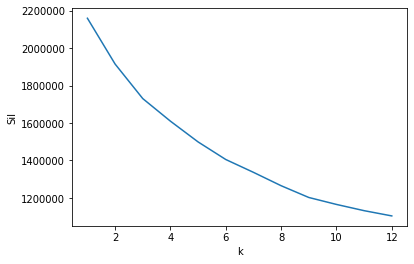

In [29]:
Km = 13
plt.plot(list(range(1, Km)), calculate_WSS(X_digits, Km))
plt.xlabel('k')
plt.ylabel('Sil')
plt.show() 

#### End Notes

The Elbow Method  as a decision rule can be combined with the Silhouette metric for a more confident decision. 

In the calsulation of WSS inertia, was used. There are two negative points to be considered when we talk about inertia:

  -  Inertia is a metric that assumes that your clusters are convex and isotropic, which means that if your clusters have alongated or irregular shapes this is a bad metric;
  -  Also, the inertia isn’t normalized, so if you have space with many dimensions you’ll probably face the “dimensionality curse” since the distances tend to get inflated in multidimensional spaces.